<a href="https://colab.research.google.com/github/Nanangk/Clean-Messy_Room_Classification_with_CNN/blob/master/Clean_Messy_Room_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clean/Messy Room Classification with CNN**
<p>tensorflow + keras library

In [0]:
#Import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Persiapkan datanya
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2020-05-03 19:57:37--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  23.8MB/s    in 2.8s    

2020-05-03 19:57:40 (23.8 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [0]:
## melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [5]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [0]:
#membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

#membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

#membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

#membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [0]:
# membuat sebuah objek ImageDataGenerator untuk data training dan data testing.

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [8]:
#menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150,150),
                  batch_size = 4,
                  class_mode = 'binary'#karena masalah klasifikasi 2 kelas
)

validation_generator = test_datagen.flow_from_directory(
                  validation_dir,
                  target_size = (150,150),
                  batch_size = 4,
                  class_mode = 'binary'#karena masalah klasifikasi 2 kelas
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [9]:
#membangun arsitektur sebuah CNN
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential 

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')

])

Using TensorFlow backend.


In [0]:
model.compile(
    loss='binary_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics= ['accuracy']
)

In [11]:
model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 1
)

Epoch 1/20
25/25 [==============================] - 7s 274ms/step - loss: 0.7268 - accuracy: 0.4900 - val_loss: 0.6656 - val_accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - 1s 37ms/step - loss: 0.6976 - accuracy: 0.5000 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 3/20
25/25 [==============================] - 1s 35ms/step - loss: 0.6946 - accuracy: 0.5300 - val_loss: 0.6927 - val_accuracy: 0.8000
Epoch 4/20
25/25 [==============================] - 1s 38ms/step - loss: 0.6935 - accuracy: 0.4600 - val_loss: 0.6893 - val_accuracy: 0.8000
Epoch 5/20
25/25 [==============================] - 1s 35ms/step - loss: 0.6772 - accuracy: 0.5800 - val_loss: 0.5237 - val_accuracy: 0.8000
Epoch 6/20
25/25 [==============================] - 1s 38ms/step - loss: 0.6619 - accuracy: 0.6300 - val_loss: 0.6884 - val_accuracy: 0.6500
Epoch 7/20
25/25 [==============================] - 1s 36ms/step - loss: 0.6670 - accuracy: 0.5900 - val_loss: 0.5670 - val_accuracy: 0.5500
Epoch 8/20
2

Saving kamarrapi.jfif to kamarrapi.jfif
kamarrapi.jfif
clean


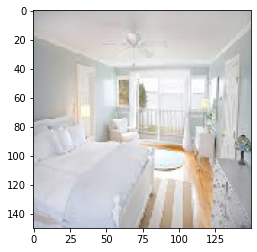

In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes == 0:
    print('clean')
  else:
    print('messy')
